## Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df.shape

(49993, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49993 entries, 0 to 49992
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49993 non-null  object 
 1   Country_code       49993 non-null  object 
 2   Country            49992 non-null  object 
 3   WHO_region         49992 non-null  object 
 4   New_cases          49992 non-null  float64
 5   Cumulative_cases   49992 non-null  float64
 6   New_deaths         49992 non-null  float64
 7   Cumulative_deaths  49992 non-null  float64
dtypes: float64(4), object(4)
memory usage: 3.1+ MB


In [6]:
df.columns = [i.replace(" ","") for i in df.columns]
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [7]:
df = df[df['Country'] == "India"]
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
35328,2020-01-03,IN,India,SEARO,0.0,0.0,0.0,0.0
35329,2020-01-04,IN,India,SEARO,0.0,0.0,0.0,0.0
35330,2020-01-05,IN,India,SEARO,0.0,0.0,0.0,0.0
35331,2020-01-06,IN,India,SEARO,0.0,0.0,0.0,0.0
35332,2020-01-07,IN,India,SEARO,0.0,0.0,0.0,0.0


In [8]:
df = df.reset_index(drop=True)
df = df[["Date_reported","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths"]]
df.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,0.0,0.0,0.0,0.0
1,2020-01-04,0.0,0.0,0.0,0.0
2,2020-01-05,0.0,0.0,0.0,0.0
3,2020-01-06,0.0,0.0,0.0,0.0
4,2020-01-07,0.0,0.0,0.0,0.0


In [9]:
df.tail()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
363,2020-12-31,21822.0,10266674.0,299.0,148738.0
364,2021-01-01,20035.0,10286709.0,256.0,148994.0
365,2021-01-02,19079.0,10305788.0,224.0,149218.0
366,2021-01-03,18177.0,10323965.0,217.0,149435.0
367,2021-01-04,16504.0,10340469.0,214.0,149649.0


In [10]:
df = df.iloc[27:,:]
df.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
27,2020-01-30,5.0,5.0,0.0,0.0
28,2020-01-31,0.0,5.0,0.0,0.0
29,2020-02-01,0.0,5.0,0.0,0.0
30,2020-02-02,1.0,6.0,0.0,0.0
31,2020-02-03,1.0,7.0,0.0,0.0


In [11]:
df.tail()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
363,2020-12-31,21822.0,10266674.0,299.0,148738.0
364,2021-01-01,20035.0,10286709.0,256.0,148994.0
365,2021-01-02,19079.0,10305788.0,224.0,149218.0
366,2021-01-03,18177.0,10323965.0,217.0,149435.0
367,2021-01-04,16504.0,10340469.0,214.0,149649.0


In [12]:
df.to_csv("India.csv",index=False)

### New Cases as target variable

In [18]:
data = pd.read_csv("India.csv",usecols=["Date_reported","New_cases"],parse_dates=['Date_reported'],index_col="Date_reported")
# pd.read_csv("India.csv").head()
data.head()

,New_cases
Date_reported,
2020-01-30,5.0
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
2020-02-03,1.0


In [19]:
data.tail()

,New_cases
Date_reported,
2020-12-31,21822.0
2021-01-01,20035.0
2021-01-02,19079.0
2021-01-03,18177.0
2021-01-04,16504.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 341 entries, 2020-01-30 to 2021-01-04
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   New_cases  341 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [21]:
data.describe()

,New_cases
count,341.000000
mean,30323.956012
std,29412.963726
min,0.000000
25%,1429.000000
50%,22771.000000
75%,52050.000000
max,97894.000000


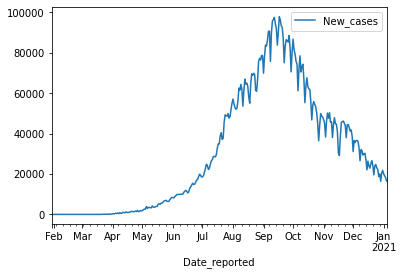

In [22]:
data.plot()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
scaler.fit(data[['New_cases']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
scaled_train = pd.DataFrame(scaler.transform(data[["New_cases"]]))

## Create Dataset

In [34]:
def prepare_data(data,n_features):
  X, y, = [], []
  for i in range(len(data)):
    end = i + n_features
    if end > len(data) - 1:
      break
    X.append(data[i:end])
    y.append(data[end])
  return np.array(X), np.array(y)

In [35]:
scaled_train.head()

,0
0,0.000051
1,0.000000
2,0.000000
3,0.000010
4,0.000010


In [36]:
scaled_train_list = list(scaled_train[0])

In [37]:
X_train, y_train = prepare_data(scaled_train_list, 15)

In [38]:
X_train.shape,y_train.shape

((326, 15), (326,))

In [39]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [40]:
X_train.shape

(326, 15, 1)

## Model

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Flatten, Dropout

In [42]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(15, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [43]:
# model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

In [44]:
 model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/100
37/37 [==============================] - 7s 70ms/step - loss: 0.0015 - val_loss: 0.0111
Epoch 2/100
37/37 [==============================] - 1s 31ms/step - loss: 0.0281 - val_loss: 0.0152
Epoch 3/100
37/37 [==============================] - 1s 32ms/step - loss: 0.0311 - val_loss: 0.0023
Epoch 4/100
37/37 [==============================] - 1s 31ms/step - loss: 0.0370 - val_loss: 0.0046
Epoch 5/100
37/37 [==============================] - 1s 31ms/step - loss: 0.0478 - val_loss: 0.0492
Epoch 6/100
37/37 [==============================] - 1s 31ms/step - loss: 0.0392 - val_loss: 0.0516
Epoch 7/100
37/37 [==============================] - 1s 32ms/step - loss: 0.0112 - val_loss: 0.0526
Epoch 8/100
37/37 [==============================] - 1s 31ms/step - loss: 0.0112 - val_loss: 0.0424
Epoch 9/100
37/37 [==============================] - 1s 31ms/step - loss: 0.0051 - val_loss: 0.0218
Epoch 10/100
37/37 [==============================] - 1s 32ms/step - loss: 0.0057 - val_loss: 0.0269

In [45]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [47]:
import matplotlib.pyplot as plt

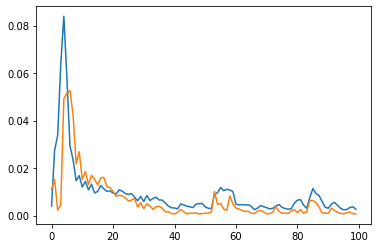

In [48]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show()

## Next 15 Days Prediction

In [49]:
x_input = np.array(list(scaled_train[0][-15:]))
temp_input=list(x_input)
lst_output=[]
print(temp_input)

[0.2486056346660674, 0.1997670950211453, 0.24465237910392873, 0.25243630866038774, 0.23563241873863566, 0.22752160500132798, 0.19134982736429199, 0.2045171307741026, 0.16785502686579362, 0.2099107197581057, 0.22291458107749199, 0.2046601426032239, 0.1948944777003698, 0.1856804298526978, 0.16859051627270313]


In [50]:
i=0
while(i<15):
    if(len(temp_input)>15):
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape((1, 15, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, 15, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[0.18012181, 0.1749917, 0.17256948, 0.16724762, 0.16026402, 0.15308428, 0.14555, 0.13958454, 0.13281012, 0.12803108, 0.120879546, 0.11205557, 0.10309938, 0.09378202, 0.08424474]


In [52]:
from datetime import date, timedelta
d1 = date(2021, 1, 5)   # start date
d2 = date(2021, 1, 20)
days = [d1 + timedelta(days=x) for x in range((d2-d1).days + 1)]

In [56]:
for i in range(15):
  print(f"{str(days[i])}: {int(scaler.inverse_transform([[lst_output[i]]])[0][0])}")

2021-01-05: 17632
2021-01-06: 17130
2021-01-07: 16893
2021-01-08: 16372
2021-01-09: 15688
2021-01-10: 14986
2021-01-11: 14248
2021-01-12: 13664
2021-01-13: 13001
2021-01-14: 12533
2021-01-15: 11833
2021-01-16: 10969
2021-01-17: 10092
2021-01-18: 9180
2021-01-19: 8247
